# 🛠️ **Preparación de los Datos**

## Extracción del Archivo Tratado

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv('https://raw.githubusercontent.com/michitruste/Challenge_TelecomX_parte_2/refs/heads/main/datos_tratados.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [190]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'CuentasDiarias'],
      dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


## Eliminación de Columnas Irrelevantes

In [192]:
df = df.drop(columns=['customerID']) # no aporta datos necesarios para el modelo
df = df.drop(columns=['Charges.Monthly']) # está altamente relacionada con Charges.daily, pero con más amplitud entre valores
df = df.drop(columns=['Charges.Total']) # está relacionada con charges daily y monthly y además con meses de permanencia

## Encoding

In [193]:
df_clean = df.copy()

cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No phone service', 'No')

categorical_cols = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

In [194]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,SeniorCitizen,tenure,CuentasDiarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,2.19,False,False,True,True,True,False,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.00,False,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.46,True,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.27,True,True,True,False,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.80,True,False,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,13,1.84,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
7028,0,22,2.84,True,True,True,False,True,True,True,...,False,False,False,True,False,False,True,False,True,False
7029,0,2,1.68,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
7030,0,67,2.26,False,True,True,True,True,False,False,...,True,True,False,True,False,True,False,False,False,True


In [195]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   CuentasDiarias                         7032 non-null   float64
 3   Churn_Yes                              7032 non-null   bool   
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_Yes                      7032 non-null   bool   
 9   InternetService_Fiber optic            7032 non-null   bool   
 10  InternetService_No                     7032 non-null   bool   
 11  Onli

In [196]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
CuentasDiarias,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_Yes,0
InternetService_Fiber optic,0


## Verificación de la proporción de cancelación

In [207]:
conteo = df_encoded['Churn_Yes'].value_counts()

proporcion = df_encoded['Churn_Yes'].value_counts(normalize=True)

print("Conteo:\n", conteo)
print("\nProporción:\n", proporcion)


Conteo:
 Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporción:
 Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64


# **🎯 Correlación y Selección de Variables**

## Análisis de correlación

In [198]:
corr = df_encoded.corr()

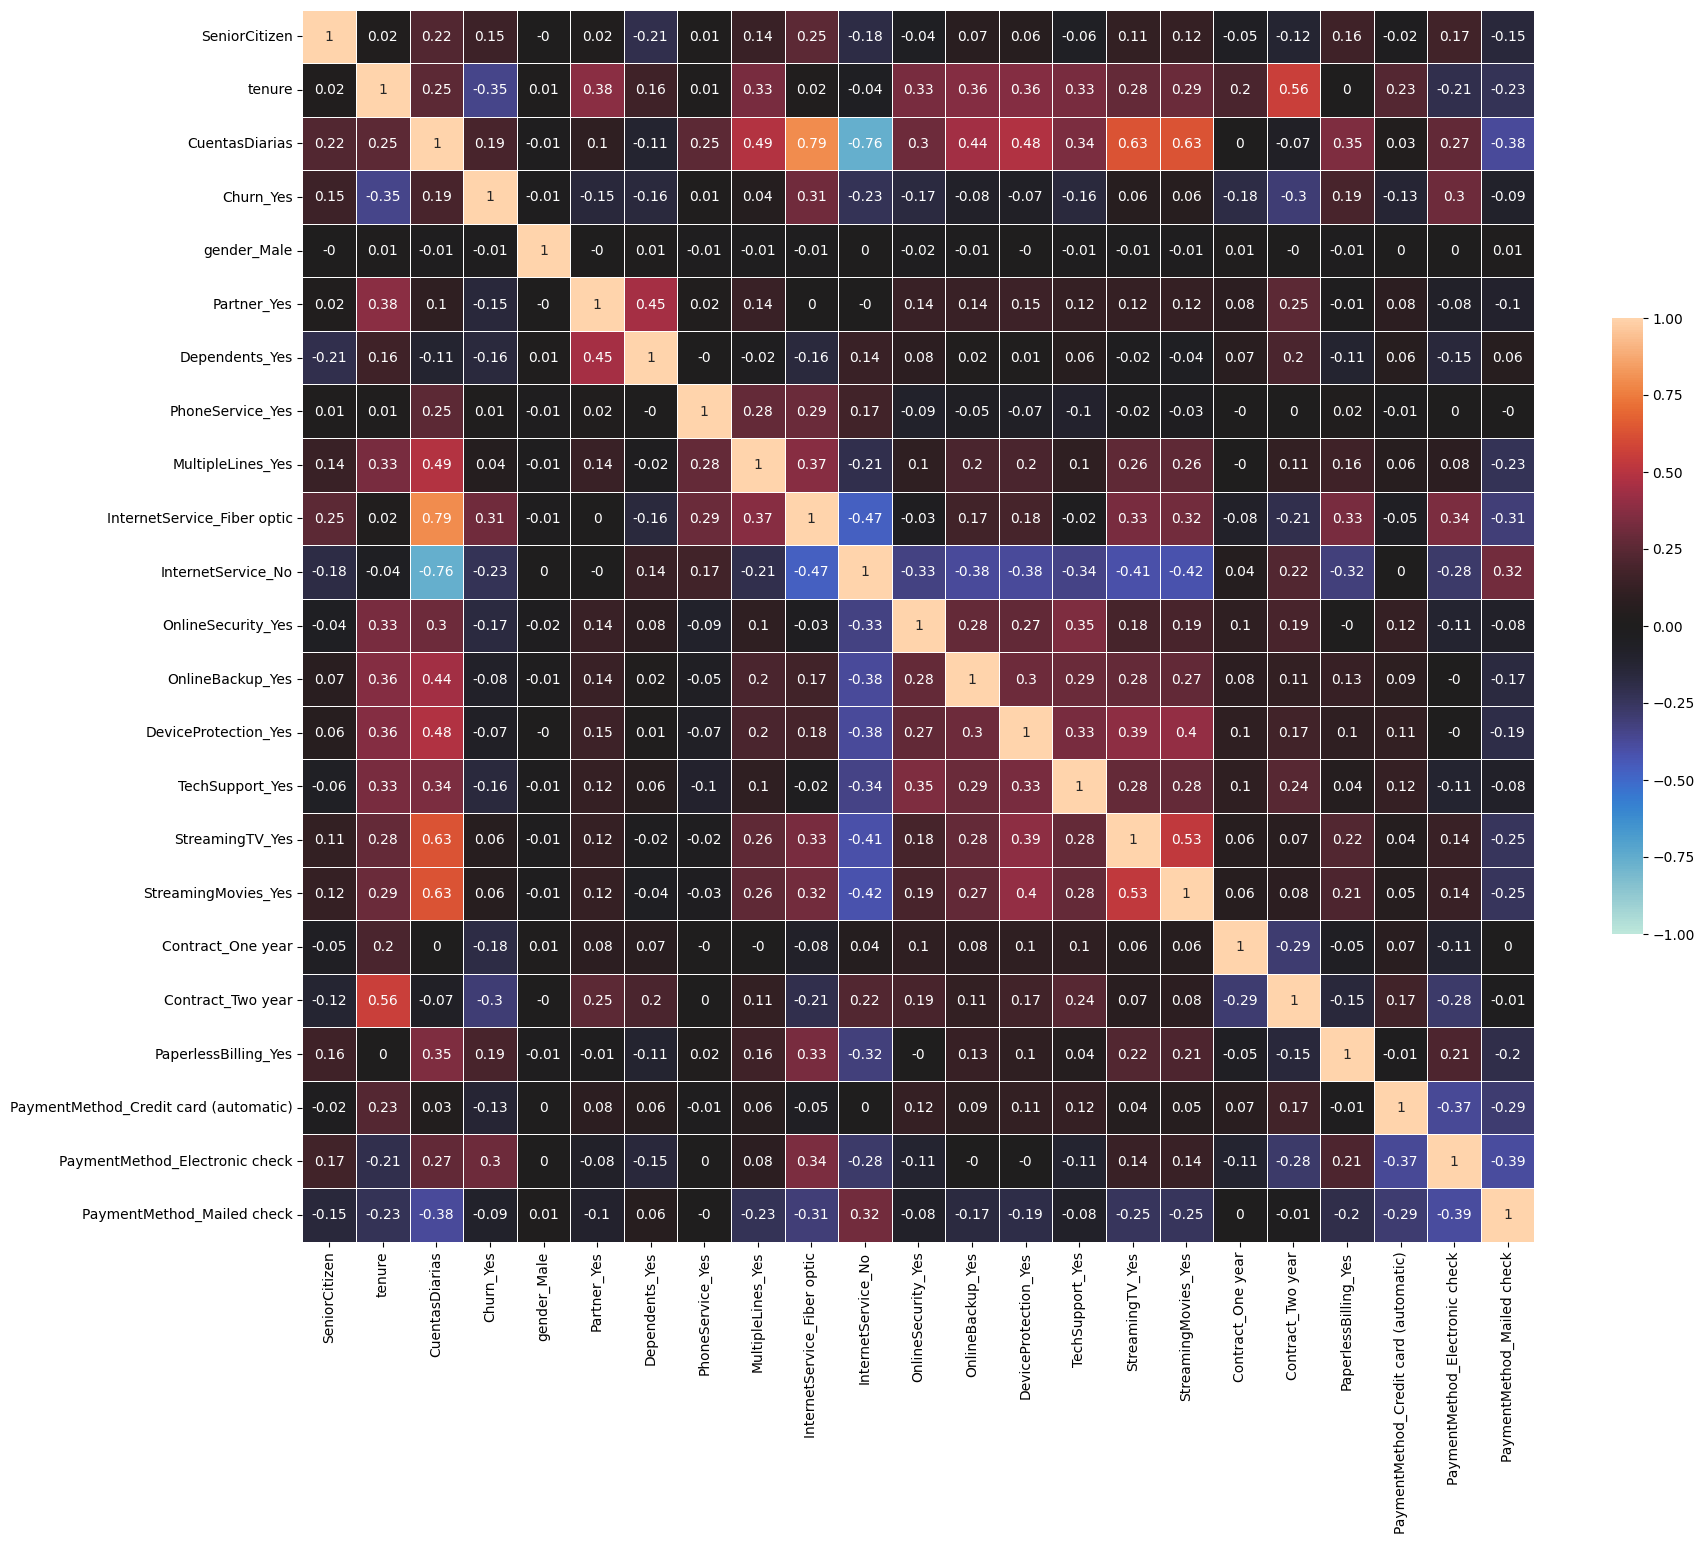

In [206]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

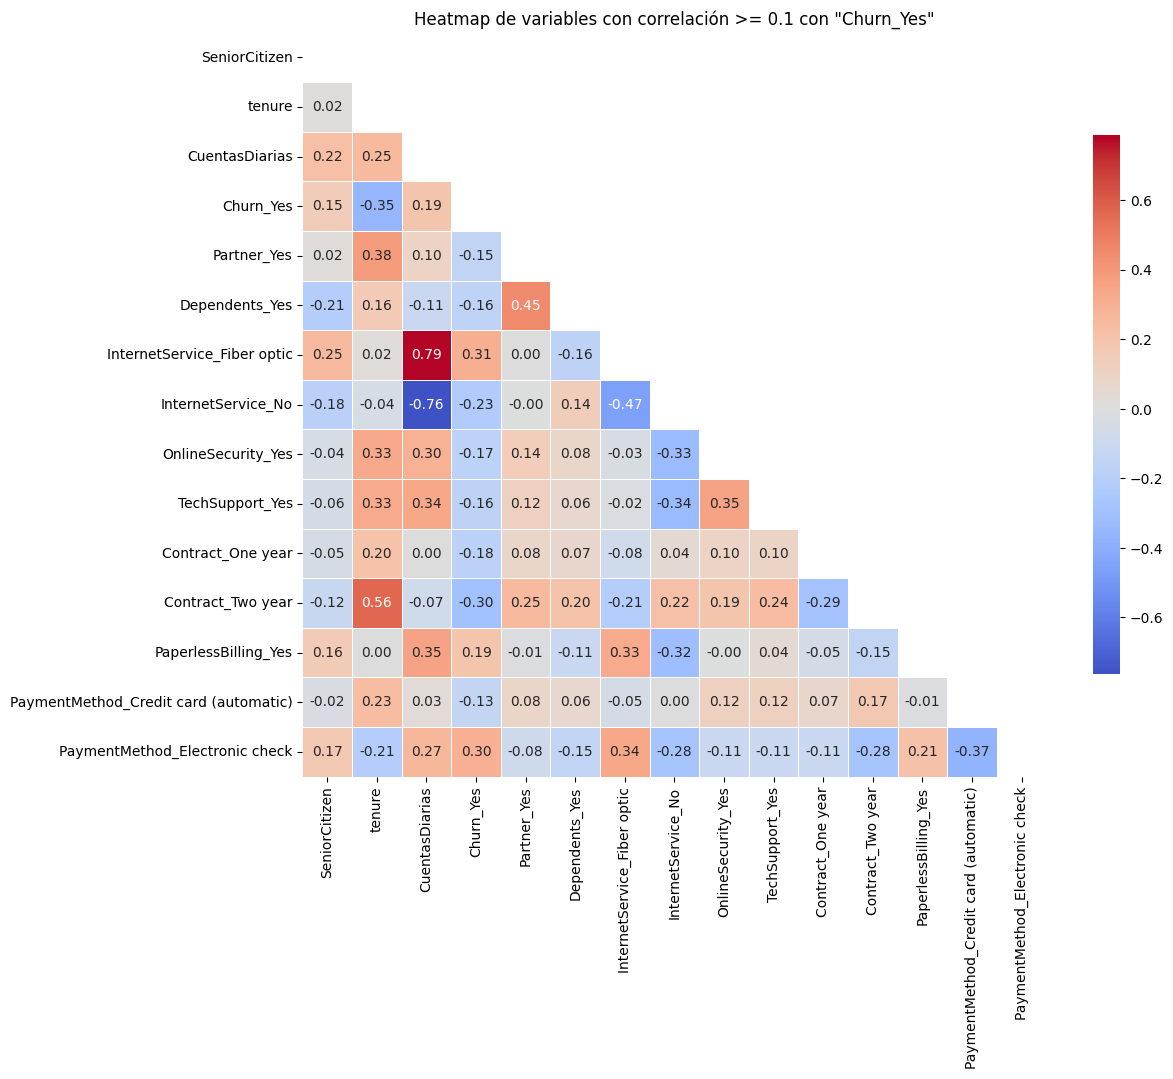

In [203]:
target_var = 'Churn_Yes'

limiar = 0.1

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

## Análisis dirigido

# **🤖 Modelado Predictivo**

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## Separación de datos

In [204]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

## Creación de modelos y evaluación

### Random forest

In [211]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7781990521327015
ROC AUC: 0.8133911936744884
Matriz de Confusión:
 [[1322  227]
 [ 241  320]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.59      0.57      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



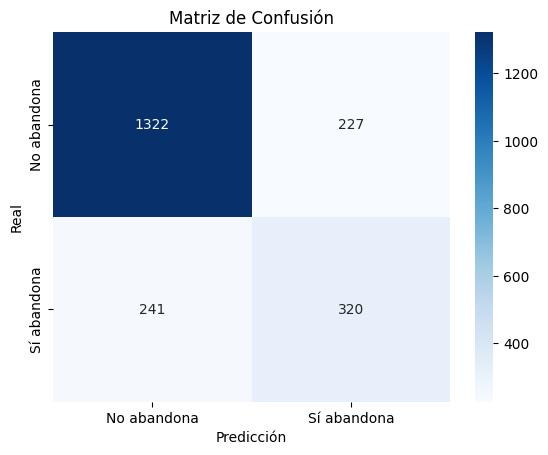

In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No abandona","Sí abandona"], yticklabels=["No abandona","Sí abandona"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()